# A Third Empirical Exploration of Machine Learning Concepts 

## Linear classifiers
Lets define the class of affine function $${\cal L}_d = \{h_{\mathbf{w},b}: \mathbf{w}\in\mathbb{R}^d, b\in\mathbb{R}\},$$
where $$h_{\mathbf{w},b}(\mathbf{x})=\mathbf{w}\cdot \mathbf{x}+b = \sum_{j=1}^d w_jx_j + b.$$

### The perceptron
<img src="perceptron_a.png" alt="perceptron unit" style="width: 200px;"/>

The perceptron algorithm was proposed by Rosenblatt in 1958. It is inspired by the biological neuron cell. The perceptron is described by:
- Input: $\mathbf{x}=(x_1,\ldots,x_d)\in\mathbb{R}^d$ 
- Output: $y\in\{-1,1\}$
- Parameter: $\mathbf{w}=(w_1,\ldots,w_d)\in\mathbb{R}^d$
- 2 steps:
  + integration: $f(\mathbf{x})=\mathbf{w}\cdot \mathbf{x} = \sum_{r=1}^d w_r x_r$
  + transfer: $g\circ f(\mathbf{x}) = \textrm{sign}(f(\mathbf{x}))$

The perceptron training algorithm goes as follows:
- Input: A training set $S = \{(\mathbf{x}_1, y_1), \ldots,(\mathbf{x}_m, y_m)\}$
- Initialization: $t=0$, $\mathbf{w}^{(t)}=(0,\ldots,0)$
- Until convergence or reaching a specified t=T:
  + if $\exists i\in[m]\quad s.t.\quad (\mathbf{w}^{(t)} \cdot \mathbf{x}_i) y_i \leq 0$ then
  + Update: $\mathbf{w}^{(t+1)}=\mathbf{w}^{(t)}+y_i\mathbf{x}_i$

In the reliazable case the perceptron algorithm is garantee to converge. In the non-reliazable case one has to set a maximal number of iterations (to perform early stopping).

The perceptron returns a linear classifier that divides the domain in two halfspaces along the affine function. 

Lets assume ${\cal Y}=\{-1,1\}$. The hypothesis class of halfspaces can be defined as:
$${\cal H}_{half}=sign \circ {\cal L}_d=\{\mathbf{x}\mapsto sign(h_{\mathbf{w},b}(\mathbf{x})), h_{\mathbf{w},b}\in{\cal L}_d\}$$

### Logistic regression
The *sigmoid* function $\phi_{sig}:\mathbb{R}\rightarrow ]0,1[$ is defined by: $$\phi_{sig}(z)=\frac{1}{1+e^{-z}}$$

In the logistic regression we learn an hypothesis from the following hypothesis class:
$${\cal H}_{sig}=\phi_{sig} \circ {\cal L}_d=\{\mathbf{x}\mapsto \phi_{sig}(h_{\mathbf{w},b}(\mathbf{x})), h_{\mathbf{w},b}\in{\cal L}_d\}$$

The output $h(\mathbf{x})=\phi_{sig}(\mathbf{w}\cdot \mathbf{x})$ of an hypothesis $h \in {\cal H}_{sig}$ can be interpreted as the *probability* that $\mathbf{x}$ is labeled 1, $$P(y=1|\mathbf{x},y)=1-P(y=-1|\mathbf{x},y).$$ 

$%-\log(L(S|\mathbf{w}))=-\log(\prod_{i=1}^m P(y_i=1|\mathbf{x}_i,y_i)) = \sum_{i=1}^m (-\log(P(y_i=1|\mathbf{x}_i,y_i)))$



## iris Data
![3 differents iris species](./iris-machinelearning.png)

### Load the data
It is a classical toy example, hence it is included in scikit-learn package.

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

iris is a dictionary with the following keys:

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
import pandas as pd
X = pd.DataFrame(iris.data, columns=['sepal length','sepal width', 'petal length','petal width'])
y = pd.Series(iris.target)

> ### Questions:
> 1. What is the domain set of the Iris dataset?
> 1. Consider only 2 dimensions: visualise the dataset and the classes
> 1.  Recode the classes to get a binary classification problem :
>    * Iris setosa : -1
>    * Iris Versicolor & Iris Virginica : 1
> 1. Use the [perceptron algorithm](https://en.wikipedia.org/wiki/Perceptron), implemented in the scikit-learn library, to separate the 2 classes. Compute the empirical and generalization errors. Visualize the decision function (use the weights $w$).
> 1. Use the logistic regression algorithm to separate the 2 classes. Compute the empirical and generalization errors. Visualize the decision function (use the weights $w$).
> 1. Recode the classes
>    * Iris Virginica : -1
>    * Iris Setosa & Iris Versicolor : 1
> 1. Repeat the questions 4 and 5 for this classification problem

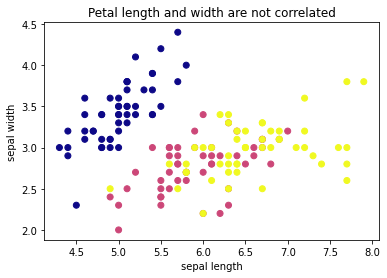

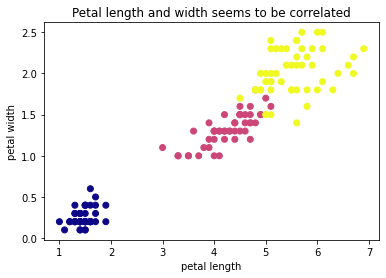

In [5]:
#Q2
import matplotlib.pyplot as plt
plt.scatter(X['sepal length'],X['sepal width'], c=y, cmap='plasma')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Petal length and width are not correlated')
plt.show()
plt.scatter(X['petal length'],X['petal width'], c=y, cmap='plasma')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Petal length and width seems to be correlated')
plt.show()

In [6]:
#Q3
#Recode the classes to get a binary classification problem
y_binary = y.replace({0:-1, 1:1, 2:1})
print(y_binary)

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
145    1
146    1
147    1
148    1
149    1
Length: 150, dtype: int64


In [7]:
#Q4
from sklearn.linear_model import Perceptron
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split
import pandas as pd

def separate_two_classes(X, y, algo):
    # Split the data into 70% training data and 30% test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    # Train
    clf = algo
    clf.fit(X_train, y_train)
    # Predict
    ypred_train = clf.predict(X_train)
    w = clf.decision_function(X_train)
    #print("w :",w)
    #Empirical loss
    loss = zero_one_loss(y_train, ypred_train)
    print("Empirical error :",loss)
    #Generalization error
    ypred_test = clf.predict(X_test)
    loss = zero_one_loss(y_test, ypred_test)
    print("Generalization error :",loss)
    
separate_two_classes(X, y_binary, Perceptron())




Empirical error : 0.0
Generalization error : 0.0


In [8]:
#Q5
from sklearn.linear_model import LogisticRegression

separate_two_classes(X, y_binary, LogisticRegression())


Empirical error : 0.0
Generalization error : 0.0


In [20]:
#Q6
#Recode the classes Iris Virginica : -1, Iris Setosa & Iris Versicolor : 1
y_binary2 = y.replace({0:1, 1:1, 2:-1})
print(y_binary2)

0      1
1      1
2      1
3      1
4      1
      ..
145   -1
146   -1
147   -1
148   -1
149   -1
Length: 150, dtype: int64


In [37]:
#Q6.1
separate_two_classes(X, y_binary2, Perceptron())

Empirical error : 0.02857142857142858
Generalization error : 0.06666666666666665


In [11]:
#Q6.2
separate_two_classes(X, y_binary2, LogisticRegression())

Empirical error : 0.02857142857142858
Generalization error : 0.022222222222222254
